## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import itertools

# 設定 GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/home/seanyu/.conda/envs/tf18_keras/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理函式
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [7]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.1028 - acc: 0.2191 - val_loss: 1.9447 - val_acc: 0.2844
Epoch 2/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.8245 - acc: 0.3407 - val_loss: 1.8301 - val_acc: 0.3393
Epoch 3/50
50000/50000 [==============================] - 16s 317us/step - loss: 1.7510 - acc: 0.3745 - val_loss: 1.9809 - val_acc: 0.3049
Epoch 4/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.6830 - acc: 0.3982 - val_loss: 1.8086 - val_acc: 0.3650
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6456 - acc: 0.4143 - val_loss: 1.6863 - val_acc: 0.4063
Epoch 6/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.6057 - acc: 0.4260 - val_loss: 1.6383 - val_acc: 0.4162
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.6018 - acc: 0.4284 - val_loss: 1.6349 - 

Epoch 2/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.8433 - acc: 0.3260 - val_loss: 1.9109 - val_acc: 0.3002
Epoch 3/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.7974 - acc: 0.3412 - val_loss: 1.7522 - val_acc: 0.3574
Epoch 4/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.7523 - acc: 0.3648 - val_loss: 1.7605 - val_acc: 0.3674
Epoch 5/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.7251 - acc: 0.3769 - val_loss: 1.8378 - val_acc: 0.3337
Epoch 6/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.6975 - acc: 0.3871 - val_loss: 1.8079 - val_acc: 0.3621
Epoch 7/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.6820 - acc: 0.3989 - val_loss: 1.7860 - val_acc: 0.3659
Epoch 8/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.6739 - acc: 0.4021 - val_loss: 1.7060 - val_acc: 0.3823
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 13s 263us/step - loss: 1.6820 - acc: 0.4050 - val_loss: 1.7041 - val_acc: 0.3887
Epoch 4/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.6271 - acc: 0.4221 - val_loss: 1.6686 - val_acc: 0.4077
Epoch 5/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5809 - acc: 0.4402 - val_loss: 1.6668 - val_acc: 0.4048
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.5433 - acc: 0.4551 - val_loss: 1.6313 - val_acc: 0.4288
Epoch 7/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5120 - acc: 0.4650 - val_loss: 1.5493 - val_acc: 0.4453
Epoch 8/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.4784 - acc: 0.4775 - val_loss: 1.5195 - val_acc: 0.4587
Epoch 9/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.4550 - acc: 0.4864 - val_loss: 1.5093 - val_acc: 0.4637
Epoch 10/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 121us/step - loss: 1.4046 - acc: 0.5021 - val_loss: 1.4764 - val_acc: 0.4752
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.3599 - acc: 0.5182 - val_loss: 1.4338 - val_acc: 0.4805
Epoch 7/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.3253 - acc: 0.5300 - val_loss: 1.3940 - val_acc: 0.5048
Epoch 8/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.2903 - acc: 0.5412 - val_loss: 1.4254 - val_acc: 0.4948
Epoch 9/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.2638 - acc: 0.5490 - val_loss: 1.4721 - val_acc: 0.4880
Epoch 10/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.2292 - acc: 0.5618 - val_loss: 1.3845 - val_acc: 0.5082
Epoch 11/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.2004 - acc: 0.5736 - val_loss: 1.4087 - val_acc: 0.5067
Epoch 12/50
50000/50000 [===================

50000/50000 [==============================] - 3s 68us/step - loss: 1.7968 - acc: 0.3709 - val_loss: 1.7925 - val_acc: 0.3684
Epoch 8/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7774 - acc: 0.3780 - val_loss: 1.7720 - val_acc: 0.3799
Epoch 9/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7590 - acc: 0.3855 - val_loss: 1.7544 - val_acc: 0.3855
Epoch 10/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7428 - acc: 0.3900 - val_loss: 1.7436 - val_acc: 0.3884
Epoch 11/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7276 - acc: 0.3956 - val_loss: 1.7262 - val_acc: 0.3953
Epoch 12/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7143 - acc: 0.3992 - val_loss: 1.7104 - val_acc: 0.4040
Epoch 13/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.7018 - acc: 0.4057 - val_loss: 1.7024 - val_acc: 0.4064
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 14s 280us/step - loss: 1.6194 - acc: 0.4334 - val_loss: 1.6147 - val_acc: 0.4371
Epoch 9/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5971 - acc: 0.4415 - val_loss: 1.5943 - val_acc: 0.4424
Epoch 10/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5767 - acc: 0.4472 - val_loss: 1.5842 - val_acc: 0.4438
Epoch 11/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.5571 - acc: 0.4555 - val_loss: 1.5740 - val_acc: 0.4404
Epoch 12/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.5395 - acc: 0.4620 - val_loss: 1.5552 - val_acc: 0.4533
Epoch 13/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.5229 - acc: 0.4668 - val_loss: 1.5369 - val_acc: 0.4587
Epoch 14/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.5058 - acc: 0.4744 - val_loss: 1.5425 - val_acc: 0.4512
Epoch 15/50
50000/50000 [============

Epoch 9/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.4783 - acc: 0.4803 - val_loss: 1.4947 - val_acc: 0.4747
Epoch 10/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.4521 - acc: 0.4903 - val_loss: 1.4996 - val_acc: 0.4738
Epoch 11/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.4265 - acc: 0.4978 - val_loss: 1.4916 - val_acc: 0.4697
Epoch 12/50
50000/50000 [==============================] - 14s 270us/step - loss: 1.4046 - acc: 0.5067 - val_loss: 1.4409 - val_acc: 0.4919
Epoch 13/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.3809 - acc: 0.5144 - val_loss: 1.4368 - val_acc: 0.4901
Epoch 14/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.3626 - acc: 0.5213 - val_loss: 1.4425 - val_acc: 0.4905
Epoch 15/50
50000/50000 [==============================] - 14s 288us/step - loss: 1.3411 - acc: 0.5253 - val_loss: 1.4105 - val_acc: 0.5028
Epoch 16/50
50000/500

Epoch 10/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.2668 - acc: 0.5537 - val_loss: 1.3676 - val_acc: 0.5175
Epoch 11/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.2449 - acc: 0.5594 - val_loss: 1.3602 - val_acc: 0.5162
Epoch 12/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.2154 - acc: 0.5712 - val_loss: 1.3735 - val_acc: 0.5238
Epoch 13/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.1894 - acc: 0.5788 - val_loss: 1.3599 - val_acc: 0.5280
Epoch 14/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.1651 - acc: 0.5880 - val_loss: 1.3544 - val_acc: 0.5232
Epoch 15/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.1395 - acc: 0.5972 - val_loss: 1.3536 - val_acc: 0.5288
Epoch 16/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.1159 - acc: 0.6045 - val_loss: 1.3507 - val_acc: 0.5339
Epoch 17/50
50000/50000 [==

50000/50000 [==============================] - 13s 264us/step - loss: 2.1021 - acc: 0.2651 - val_loss: 2.0932 - val_acc: 0.2702
Epoch 12/50
50000/50000 [==============================] - 13s 251us/step - loss: 2.0879 - acc: 0.2702 - val_loss: 2.0794 - val_acc: 0.2745
Epoch 13/50
50000/50000 [==============================] - 13s 260us/step - loss: 2.0744 - acc: 0.2753 - val_loss: 2.0664 - val_acc: 0.2786
Epoch 14/50
50000/50000 [==============================] - 13s 254us/step - loss: 2.0618 - acc: 0.2791 - val_loss: 2.0543 - val_acc: 0.2813
Epoch 15/50
50000/50000 [==============================] - 12s 250us/step - loss: 2.0499 - acc: 0.2833 - val_loss: 2.0428 - val_acc: 0.2831
Epoch 16/50
50000/50000 [==============================] - 13s 269us/step - loss: 2.0387 - acc: 0.2878 - val_loss: 2.0320 - val_acc: 0.2875
Epoch 17/50
50000/50000 [==============================] - 12s 236us/step - loss: 2.0281 - acc: 0.2890 - val_loss: 2.0217 - val_acc: 0.2909
Epoch 18/50
50000/50000 [=======

50000/50000 [==============================] - 3s 68us/step - loss: 1.7941 - acc: 0.3756 - val_loss: 1.7925 - val_acc: 0.3728
Epoch 14/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7826 - acc: 0.3790 - val_loss: 1.7802 - val_acc: 0.3781
Epoch 15/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.7718 - acc: 0.3827 - val_loss: 1.7703 - val_acc: 0.3835
Epoch 16/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7616 - acc: 0.3872 - val_loss: 1.7603 - val_acc: 0.3872
Epoch 17/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7516 - acc: 0.3910 - val_loss: 1.7532 - val_acc: 0.3922
Epoch 18/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7424 - acc: 0.3946 - val_loss: 1.7426 - val_acc: 0.3912
Epoch 19/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7337 - acc: 0.3966 - val_loss: 1.7332 - val_acc: 0.3955
Epoch 20/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 65us/step - loss: 2.2670 - acc: 0.1681 - val_loss: 2.2624 - val_acc: 0.1733
Epoch 16/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.2637 - acc: 0.1714 - val_loss: 2.2592 - val_acc: 0.1764
Epoch 17/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.2605 - acc: 0.1745 - val_loss: 2.2560 - val_acc: 0.1799
Epoch 18/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.2575 - acc: 0.1776 - val_loss: 2.2530 - val_acc: 0.1816
Epoch 19/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.2545 - acc: 0.1799 - val_loss: 2.2501 - val_acc: 0.1828
Epoch 20/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.2516 - acc: 0.1819 - val_loss: 2.2473 - val_acc: 0.1843
Epoch 21/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.2488 - acc: 0.1837 - val_loss: 2.2445 - val_acc: 0.1868
Epoch 22/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 65us/step - loss: 2.1049 - acc: 0.2616 - val_loss: 2.1009 - val_acc: 0.2645
Epoch 18/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.0965 - acc: 0.2651 - val_loss: 2.0928 - val_acc: 0.2681
Epoch 19/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.0885 - acc: 0.2675 - val_loss: 2.0849 - val_acc: 0.2711
Epoch 20/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.0808 - acc: 0.2704 - val_loss: 2.0774 - val_acc: 0.2731
Epoch 21/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.0734 - acc: 0.2739 - val_loss: 2.0701 - val_acc: 0.2753
Epoch 22/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.0662 - acc: 0.2746 - val_loss: 2.0632 - val_acc: 0.2787
Epoch 23/50
50000/50000 [==============================] - 3s 66us/step - loss: 2.0594 - acc: 0.2774 - val_loss: 2.0564 - val_acc: 0.2803
Epoch 24/50
50000/50000 [=====================

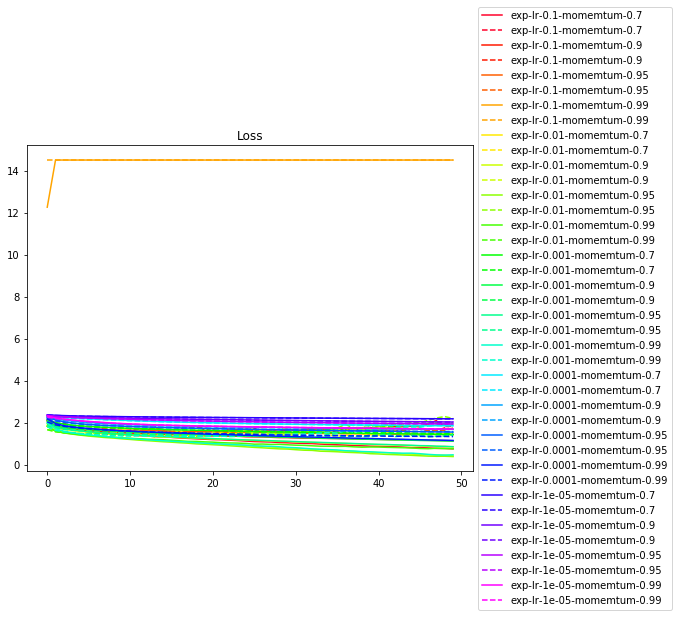

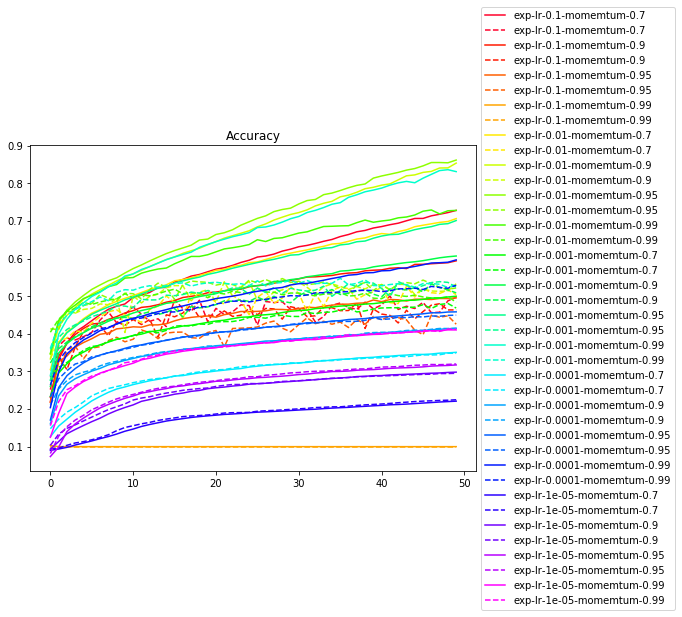

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()